Integrantes: Paulina Duque, Constanza Ríos

Código obtenido de la clase de 02/12/2021

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from statsmodels import robust
%matplotlib inline

In [7]:
Datos = pd.read_csv("https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto1/Covid-19.csv?raw=true", sep=',') #Procedemos a 
#Extraer

In [23]:
casosRM=Datos[Datos["Region"]=="Metropolitana"] #Filtrar por RM
casosRM.drop("Tasa",axis=1,inplace=True)

C:\Users\const\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [24]:
casosRM
#para ver el codigo

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-03-30,2020-04-01,2020-04-03,2020-04-06,2020-04-08,...,2021-11-01,2021-11-05,2021-11-08,2021-11-12,2021-11-15,2021-11-19,2021-11-22,2021-11-26,2021-11-29,2021-12-03
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,813.0,815.0,820.0,823.0,822.0,825.0,826.0,827.0,827.0,827.0
89,Metropolitana,13,Buin,13402.0,109641.0,7.0,8.0,14.0,20.0,20.0,...,11339.0,11397.0,11453.0,11531.0,11595.0,11639.0,11685.0,11750.0,11786.0,11828.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,6.0,7.0,7.0,7.0,8.0,...,2628.0,2653.0,2670.0,2704.0,2734.0,2762.0,2786.0,2803.0,2813.0,2824.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,4.0,4.0,5.0,11.0,...,8854.0,8884.0,8950.0,8998.0,9047.0,9087.0,9119.0,9178.0,9206.0,9213.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,19.0,21.0,26.0,31.0,36.0,...,18961.0,19056.0,19144.0,19235.0,19316.0,19398.0,19457.0,19562.0,19606.0,19644.0
93,Metropolitana,13,Colina,13301.0,180353.0,32.0,39.0,47.0,50.0,62.0,...,16081.0,16155.0,16241.0,16352.0,16420.0,16496.0,16530.0,16615.0,16653.0,16707.0
94,Metropolitana,13,Conchali,13104.0,139195.0,14.0,18.0,22.0,32.0,38.0,...,15356.0,15431.0,15517.0,15618.0,15689.0,15766.0,15810.0,15871.0,15896.0,15933.0
95,Metropolitana,13,Curacavi,13503.0,36430.0,5.0,5.0,5.0,8.0,9.0,...,4090.0,4117.0,4142.0,4171.0,4193.0,4221.0,4240.0,4257.0,4265.0,4275.0
96,Metropolitana,13,El Bosque,13105.0,172000.0,18.0,28.0,35.0,37.0,46.0,...,22439.0,22534.0,22616.0,22763.0,22832.0,22909.0,22968.0,23064.0,23107.0,23132.0
97,Metropolitana,13,El Monte,13602.0,40014.0,0.0,0.0,0.0,5.0,7.0,...,4230.0,4234.0,4244.0,4265.0,4295.0,4315.0,4329.0,4348.0,4358.0,4363.0


In [10]:
casosmelt=casosRM.melt(id_vars=["Region","Codigo region","Comuna","Codigo comuna","Poblacion"],var_name="fecha") 

#Reestructuración base de datos en donde un DataFrame se transforma en un formato en el que las columnas región, 
#codigo region, comuna, Codigo comuna y poblacion se consideran "id_vars", mientras que todas las demás columnas,
#consideradas variables medidas (value_vars), permitiendo mejor manipulación de la base.

In [11]:
casosmelt

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,fecha,value
0,Metropolitana,13,Alhue,13502.0,7405.0,2020-03-30,0.0
1,Metropolitana,13,Buin,13402.0,109641.0,2020-03-30,7.0
2,Metropolitana,13,Calera de Tango,13403.0,28525.0,2020-03-30,6.0
3,Metropolitana,13,Cerrillos,13102.0,88956.0,2020-03-30,0.0
4,Metropolitana,13,Cerro Navia,13103.0,142465.0,2020-03-30,19.0
...,...,...,...,...,...,...,...
9429,Metropolitana,13,Santiago,13101.0,503147.0,2021-12-03,49748.0
9430,Metropolitana,13,Talagante,13601.0,81838.0,2021-12-03,6094.0
9431,Metropolitana,13,Tiltil,13303.0,21477.0,2021-12-03,2117.0
9432,Metropolitana,13,Vitacura,13132.0,96774.0,2021-12-03,6069.0


In [12]:
casosmelt.drop("Codigo region",axis=1,inplace=True) #Eliminar columna "Codigo region"
casosmelt.drop("Codigo comuna",axis=1,inplace=True) #Eliminar columna "Codigo comuna"
casosmelt.drop("Poblacion",axis=1,inplace=True) #Eliminar columna "Poblacion"

In [13]:
casosmelt

,Region,Comuna,fecha,value
0,Metropolitana,Alhue,2020-03-30,0.0
1,Metropolitana,Buin,2020-03-30,7.0
2,Metropolitana,Calera de Tango,2020-03-30,6.0
3,Metropolitana,Cerrillos,2020-03-30,0.0
4,Metropolitana,Cerro Navia,2020-03-30,19.0
...,...,...,...,...
9429,Metropolitana,Santiago,2021-12-03,49748.0
9430,Metropolitana,Talagante,2021-12-03,6094.0
9431,Metropolitana,Tiltil,2021-12-03,2117.0
9432,Metropolitana,Vitacura,2021-12-03,6069.0


In [14]:
casosmelt["fecha"]=pd.to_datetime(casosmelt["fecha"])  #Convierte argumento fecha en Datatime

In [15]:
casossum=casosmelt.groupby("Comuna").resample("W-Mon",on="fecha").sum().reset_index().sort_values(by="fecha")
casossum
#Se agrupan los casos por comunas dentro de una misma fecha (sumando cantidad de casos por comuna)

,Comuna,fecha,value
0,Alhue,2020-03-30,0.0
267,Cerrillos,2020-03-30,0.0
3115,Pirque,2020-03-30,0.0
1602,La Pintana,2020-03-30,0.0
4450,Talagante,2020-03-30,0.0
...,...,...,...
2135,Lo Espejo,2021-12-06,11870.0
1423,La Cisterna,2021-12-06,11304.0
3292,Providencia,2021-12-06,11382.0
177,Buin,2021-12-06,11828.0


In [25]:
casos_LasCondes=casossum[casossum["Comuna"]=="Las Condes"] # Se filtró por la comuna de Las condes
casos_LasCondes

,Comuna,fecha,value
1869,Las Condes,2020-03-30,181.0
1870,Las Condes,2020-04-06,690.0
1871,Las Condes,2020-04-13,843.0
1872,Las Condes,2020-04-20,952.0
1873,Las Condes,2020-04-27,701.0
...,...,...,...
1953,Las Condes,2021-11-08,42983.0
1954,Las Condes,2021-11-15,43601.0
1955,Las Condes,2021-11-22,43995.0
1956,Las Condes,2021-11-29,44282.0


In [26]:
casos_LasCondes["casos_activos"]=casos_LasCondes["value"]-casos_LasCondes["value"].shift()

<ipython-input-26-a7031412c0fb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  casos_LasCondes["casos_activos"]=casos_LasCondes["value"]-casos_LasCondes["value"].shift()


In [28]:
df=casos_LasCondes[casos_LasCondes["casos_activos"]>0].reset_index() #reset index base original con uno nuevo para esta
df

,index,Comuna,fecha,value,casos_activos
0,1870,Las Condes,2020-04-06,690.0,509.0
1,1871,Las Condes,2020-04-13,843.0,153.0
2,1872,Las Condes,2020-04-20,952.0,109.0
3,1874,Las Condes,2020-05-04,886.0,185.0
4,1875,Las Condes,2020-05-11,1364.0,478.0
...,...,...,...,...,...
80,1952,Las Condes,2021-11-01,42342.0,793.0
81,1953,Las Condes,2021-11-08,42983.0,641.0
82,1954,Las Condes,2021-11-15,43601.0,618.0
83,1955,Las Condes,2021-11-22,43995.0,394.0


In [29]:
#Eliminar columnas que no se utilizan como index y value
df.drop("index",axis=1,inplace=True)
df.drop("value",axis=1,inplace=True)

<AxesSubplot:xlabel='fecha', ylabel='casos_activos'>

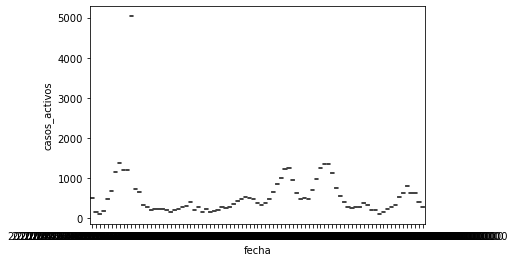

In [31]:
sns.boxplot(x="fecha", y="casos_activos",data=df)

In [32]:
Outlier=casos_LasCondes[casos_LasCondes["casos_activos"]>3000] #entrega el caso atipico buscado

In [33]:
Outlier

,Comuna,fecha,value,casos_activos
1882,Las Condes,2020-06-29,9225.0,5033.0


El Caso atípico correspondiente a Las Condes es del 29/06/2020 con 5033 casos activos.